# Descriptive Analysis

## Preparation

In [2]:
#packages needed
import pandas as pd
import numpy as np
import datetime
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY
import matplotlib.dates as mdates
import seaborn as sns
from pandas.api.types import CategoricalDtype

import warnings;
warnings.filterwarnings('ignore');

In [2]:
#reading the csv table in as data frame with panda
#if you have the problem that you cannot load this data, try to update your conda version and packages

booking_set = pd.read_csv("OPENDATA_BOOKING_CALL_A_BIKE.csv", delimiter=';')

In [3]:
booking_set.isna().sum()

BOOKING_HAL_ID                     0
CATEGORY_HAL_ID                    0
VEHICLE_HAL_ID                     0
CUSTOMER_HAL_ID                    0
DATE_BOOKING                       0
DATE_FROM                          0
DATE_UNTIL                         0
COMPUTE_EXTRA_BOOKING_FEE          0
TRAVERSE_USE                       0
DISTANCE                         514
START_RENTAL_ZONE            3394198
START_RENTAL_ZONE_HAL_ID      669310
END_RENTAL_ZONE              3439870
END_RENTAL_ZONE_HAL_ID        697042
RENTAL_ZONE_HAL_SRC           224902
CITY_RENTAL_ZONE                   0
TECHNICAL_INCOME_CHANNEL      223469
dtype: int64

In [4]:
#do not remove the NaN before actually doing something with the stations

In [5]:
booking_set.columns
#show the column names of the csv data. Remark: the file from 2017 has a lot less columns than the file from 2016
#but the 2017 file contains the time interval we were assigned

Index(['BOOKING_HAL_ID', 'CATEGORY_HAL_ID', 'VEHICLE_HAL_ID',
       'CUSTOMER_HAL_ID', 'DATE_BOOKING', 'DATE_FROM', 'DATE_UNTIL',
       'COMPUTE_EXTRA_BOOKING_FEE', 'TRAVERSE_USE', 'DISTANCE',
       'START_RENTAL_ZONE', 'START_RENTAL_ZONE_HAL_ID', 'END_RENTAL_ZONE',
       'END_RENTAL_ZONE_HAL_ID', 'RENTAL_ZONE_HAL_SRC', 'CITY_RENTAL_ZONE',
       'TECHNICAL_INCOME_CHANNEL'],
      dtype='object')

In [6]:
#get the data just Frankfurt
booking_set_frankfurt = booking_set[booking_set['CITY_RENTAL_ZONE'].str.contains('Frankfurt')]
booking_set_frankfurt

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,COMPUTE_EXTRA_BOOKING_FEE,TRAVERSE_USE,DISTANCE,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL
11,21366889,50000,106071,9C652AE093696A00AE03CE808E41FEB8207586E3,2014-01-01 00:46:33,2014-01-01 00:46:33,2014-01-01 00:54:20,Nein,Nein,0.0,Ostbahnhof,227447.0,NaN,NaN,Standort,Frankfurt am Main,iPhone CAB
17,21367245,50000,108136,52F601C735727653A8113E8AD5AC52E3BF89B492,2014-01-01 02:34:11,2014-01-01 02:34:11,2014-01-01 02:55:57,Nein,Nein,0.0,Carlo-Schmidt-Platz / Depot,214448.0,Rosa-Luxemburg-Straße / Ginnheimer Landstraße,231648.0,Standort,Frankfurt am Main,IVR
26,21367472,50000,109066,849E39869B95293B7F0DF50F3F4CC95ED129ED52,2014-01-01 03:27:52,2014-01-01 03:27:52,2014-01-01 03:31:29,Nein,Nein,0.0,Roßmarkt / An der Hauptwache,214380.0,NaN,NaN,Standort,Frankfurt am Main,Android CAB
30,21368072,50000,116406,D7EB6708429AFFCAC213B716FF7BA2C0D1FFCAAE,2014-01-01 07:01:31,2014-01-01 07:01:31,2014-01-01 07:07:57,Nein,Nein,0.0,Bettinaplatz / Bettinastraße,214394.0,NaN,NaN,Standort,Frankfurt am Main,IVR
31,21368145,50000,116338,58429BD51BD30BA6D2B41CCBA3E3EE733DE9D07B,2014-01-01 08:02:11,2014-01-01 08:02:11,2014-01-01 08:13:56,Nein,Nein,0.0,Hauptbahnhof Haupteingang (Vorplatz),214419.0,NaN,NaN,Standort,Frankfurt am Main,Android CAB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16228278,46382177,50000,163499,902CF8DEF6AA158418C036CCE6717D7551E671A3,2017-05-15 22:29:05,2017-05-15 22:29:05,2017-05-15 22:34:12,Ja,Nein,0.0,NaN,NaN,Studentenwohnheim Ginnheimer Landstr. 42,226257.0,Standort,Frankfurt am Main,IVR
16228279,46382184,50000,164121,A799BA8BA9892CBFF1CAA0C8481FAF49C27D2062,2017-05-15 22:29:25,2017-05-15 22:29:25,2017-05-15 22:43:06,Ja,Nein,0.0,Wendelsplatz / Darmstädter Landstraße,254302.0,Wittelsbacher Allee/ Habsburger Allee,227464.0,Standort,Frankfurt am Main,iPhone CAB
16228285,46382655,50000,165782,D940F501E7B61380A54B2AA0AD8DC7D6757237EF,2017-05-15 22:59:04,2017-05-15 22:59:04,2017-05-15 23:13:56,Ja,Nein,0.0,Roßmarkt / An der Hauptwache,214380.0,Arnsburger Straße / Mainkurstraße,227475.0,Standort,Frankfurt am Main,Android CAB
16228287,46383071,50000,164539,3D6E9CE1A4A554AF82B92020BCFAF4B6AC886446,2017-05-15 23:30:24,2017-05-15 23:30:24,2017-05-15 23:39:53,Ja,Nein,0.0,Bockenheimer Landstraße / Liebigstraße,31166.0,Kaufunger Straße / Kleine Seestraße,28835.0,Standort,Frankfurt am Main,iPhone CAB


In [7]:
#just get the two columns and convert date column to new time format
booking_set_frankfurt = booking_set_frankfurt.loc[:,['BOOKING_HAL_ID', 'DATE_BOOKING']]
booking_set_frankfurt.sort_values(['DATE_BOOKING'], axis=0, 
                 ascending=True, inplace=True) #sort the data after the date, ascending
booking_set_frankfurt['DATE_BOOKING'] = pd.to_datetime(booking_set_frankfurt['DATE_BOOKING'])
booking_set_frankfurt['DATE_BOOKING'].dt.strftime('%Y-%m-%d %X')
booking_set_frankfurt

,BOOKING_HAL_ID,DATE_BOOKING
281,21366826,2014-01-01 00:30:23
302,21366878,2014-01-01 00:44:05
509,21366882,2014-01-01 00:45:02
67,21366884,2014-01-01 00:45:32
11,21366889,2014-01-01 00:46:33
...,...,...
16227888,46386849,2017-05-16 08:13:05
16228266,46386851,2017-05-16 08:13:08
16227184,46386855,2017-05-16 08:13:17
16227537,46386859,2017-05-16 08:13:29


In [8]:
# et start date and beginning date: change date format if needed
start_date_20152016 = '2015-01-01 00:00:00'
end_date_20152016 = '2016-12-31 23:59:59'
filtered_dates_20152016 = (booking_set_frankfurt['DATE_BOOKING'] >= start_date_20152016) & (booking_set_frankfurt['DATE_BOOKING'] <= end_date_20152016)
booking_set_frankfurt_20152016 = booking_set_frankfurt.loc[filtered_dates_20152016]
booking_set_frankfurt_20152016

,BOOKING_HAL_ID,DATE_BOOKING
4284612,27689006,2015-01-01 00:21:22
4285336,27689041,2015-01-01 00:30:20
4285873,27689080,2015-01-01 00:42:51
4286542,27689151,2015-01-01 01:00:19
4286567,27689154,2015-01-01 01:00:47
...,...,...
14613160,43561784,2016-12-31 23:13:00
14613511,43561828,2016-12-31 23:23:28
14612056,43561832,2016-12-31 23:24:03
14615815,43561863,2016-12-31 23:28:04


## Amount of total bookings in the file/just in Frankfurt/just in Franfurt 15/16:
- total: 16.228.298 
- just in Frankfurt: 2.143.378
- in the time between 2015/01/01 and 2016/12/31: 1.431.643


## Amount of bookings in Frankfurt 2015:

In [9]:
#same procedure as before
start_date_2015 = '2015-01-01 00:00:00'
end_date_2015 = '2015-12-31 23:59:59'
filtered_dates_2015 = (booking_set_frankfurt['DATE_BOOKING'] >= start_date_2015) & (booking_set_frankfurt['DATE_BOOKING'] <= end_date_2015)
booking_set_frankfurt_2015 = booking_set_frankfurt.loc[filtered_dates_2015]
booking_set_frankfurt_2015

,BOOKING_HAL_ID,DATE_BOOKING
4284612,27689006,2015-01-01 00:21:22
4285336,27689041,2015-01-01 00:30:20
4285873,27689080,2015-01-01 00:42:51
4286542,27689151,2015-01-01 01:00:19
4286567,27689154,2015-01-01 01:00:47
...,...,...
8910063,34947687,2015-12-31 23:18:05
8909106,34947697,2015-12-31 23:19:40
8914589,34947717,2015-12-31 23:22:36
8909758,34947732,2015-12-31 23:28:19


Result: 516.605

In [10]:
#in case we need it, regular expression for the month: [0-9]{4}-[0-9]{2}
booking_set_frankfurt_2015['month_year'] = booking_set_frankfurt_2015['DATE_BOOKING'].dt.to_period('M')
#the following is to get the absolute values that are also stated below
#booking_set_frankfurt_2015['month_year'].value_counts()
booking_set_frankfurt_2015['month_year'].value_counts(normalize=True) #get percentage
#this one will show the percentage of bookings per month in the year 2015

2015-08    0.129848
2015-07    0.120024
2015-06    0.101987
2015-05    0.093660
2015-09    0.090320
2015-10    0.085255
2015-11    0.083222
2015-04    0.081736
2015-12    0.068958
2015-03    0.064659
2015-01    0.041304
2015-02    0.039028
Freq: M, Name: month_year, dtype: float64

Results for absolute values (not normalized as the one above):
- 2015-08:    67.080
- 2015-07:    62.005
- 2015-06:    52.687
- 2015-05:    48.385
- 2015-09:    46.660
- 2015-10:    44.043
- 2015-11:    42.993
- 2015-04:    42.225
- 2015-12:    35.624
- 2015-03:    33.403
- 2015-01:    21.338
- 2015-02:    20.162

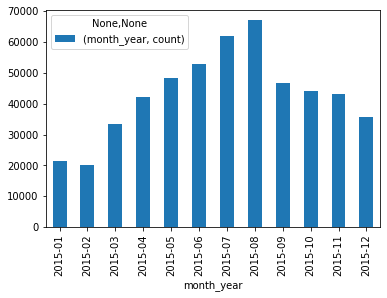

In [11]:
booking_set_frankfurt_2015.groupby(['month_year']).agg({'month_year': ['count']}).plot(kind='bar')

## Amount bookings Frankfurt 2016:

In [12]:
start_date_2016 = '2016-01-01 00:00:00'
end_date_2016 = '2016-12-31 23:59:59'
filtered_dates_2016 = (booking_set_frankfurt['DATE_BOOKING'] >= start_date_2016) & (booking_set_frankfurt['DATE_BOOKING'] <= end_date_2016)
booking_set_frankfurt_2016 = booking_set_frankfurt.loc[filtered_dates_2016]
booking_set_frankfurt_2016

,BOOKING_HAL_ID,DATE_BOOKING
8909418,34947898,2016-01-01 00:12:33
8914012,34947899,2016-01-01 00:12:46
8910295,34947919,2016-01-01 00:23:17
8908794,34947924,2016-01-01 00:24:44
8909404,34947929,2016-01-01 00:25:45
...,...,...
14613160,43561784,2016-12-31 23:13:00
14613511,43561828,2016-12-31 23:23:28
14612056,43561832,2016-12-31 23:24:03
14615815,43561863,2016-12-31 23:28:04


Result: 915.038

In [13]:
booking_set_frankfurt_2016['month_year'] = booking_set_frankfurt_2016['DATE_BOOKING'].dt.to_period('M')
booking_set_frankfurt_2016['month_year'].value_counts(normalize=True)

2016-08    0.134741
2016-07    0.122666
2016-09    0.118426
2016-06    0.114547
2016-05    0.107976
2016-04    0.090661
2016-10    0.073858
2016-11    0.060682
2016-03    0.051411
2016-12    0.044442
2016-02    0.044056
2016-01    0.036535
Freq: M, Name: month_year, dtype: float64

In [14]:
booking_set_frankfurt_2016['month_year'].value_counts() 

2016-08    123293
2016-07    112244
2016-09    108364
2016-06    104815
2016-05     98802
2016-04     82958
2016-10     67583
2016-11     55526
2016-03     47043
2016-12     40666
2016-02     40313
2016-01     33431
Freq: M, Name: month_year, dtype: int64

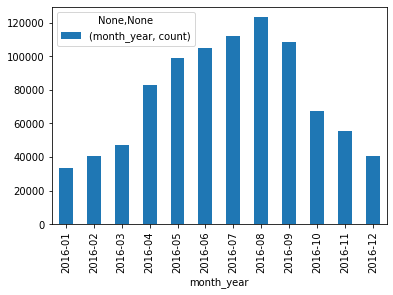

In [15]:
booking_set_frankfurt_2016.groupby(['month_year']).agg({'month_year': ['count']}).plot(kind='bar')

## Amount of bookings in the seasons:


In [16]:
#2015
#December, January, February
start_date_dec_2015 = '2015-12-01 00:00:00'
end_date_dec_2015 = '2015-12-31 23:59:59'
filtered_dates_dec_2015 = (booking_set_frankfurt['DATE_BOOKING'] >= start_date_dec_2015) & (booking_set_frankfurt['DATE_BOOKING'] <= end_date_dec_2015) 
booking_set_frankfurt_dec_2015 = booking_set_frankfurt.loc[filtered_dates_dec_2015]
booking_set_frankfurt_dec_2015

,BOOKING_HAL_ID,DATE_BOOKING
8627664,34451014,2015-12-01 00:01:14
8628529,34451039,2015-12-01 00:05:35
8627485,34451050,2015-12-01 00:07:01
8627189,34451051,2015-12-01 00:07:05
8628465,34451064,2015-12-01 00:08:25
...,...,...
8910063,34947687,2015-12-31 23:18:05
8909106,34947697,2015-12-31 23:19:40
8914589,34947717,2015-12-31 23:22:36
8909758,34947732,2015-12-31 23:28:19


In [17]:
start_date_winter_2015 = '2015-01-01 00:00:00'
end_date_winter_2015 = '2015-02-28 23:59:59'
filtered_dates_winter_2015 = (booking_set_frankfurt['DATE_BOOKING'] >= start_date_winter_2015) & (booking_set_frankfurt['DATE_BOOKING'] <= end_date_winter_2015) 
booking_set_frankfurt_winter_2015 = booking_set_frankfurt.loc[filtered_dates_winter_2015]
booking_set_frankfurt_winter_2015

,BOOKING_HAL_ID,DATE_BOOKING
4284612,27689006,2015-01-01 00:21:22
4285336,27689041,2015-01-01 00:30:20
4285873,27689080,2015-01-01 00:42:51
4286542,27689151,2015-01-01 01:00:19
4286567,27689154,2015-01-01 01:00:47
...,...,...
4613551,28356046,2015-02-28 23:25:03
4616225,28356058,2015-02-28 23:26:35
4616709,28356074,2015-02-28 23:30:21
4616246,28356112,2015-02-28 23:38:01


In [18]:
#combine the two frames
frames = [booking_set_frankfurt_dec_2015, booking_set_frankfurt_winter_2015]
winter_2015 = pd.concat(frames)
winter_2015

,BOOKING_HAL_ID,DATE_BOOKING
8627664,34451014,2015-12-01 00:01:14
8628529,34451039,2015-12-01 00:05:35
8627485,34451050,2015-12-01 00:07:01
8627189,34451051,2015-12-01 00:07:05
8628465,34451064,2015-12-01 00:08:25
...,...,...
4613551,28356046,2015-02-28 23:25:03
4616225,28356058,2015-02-28 23:26:35
4616709,28356074,2015-02-28 23:30:21
4616246,28356112,2015-02-28 23:38:01


In [19]:
##March, April, Mai
start_date_spring_2015 = '2015-03-01 00:00:00'
end_date_spring_2015 = '2015-05-31 23:59:59'
filtered_dates_spring_2015 = (booking_set_frankfurt['DATE_BOOKING'] >= start_date_spring_2015) & (booking_set_frankfurt['DATE_BOOKING'] <= end_date_spring_2015)
booking_set_frankfurt_spring_2015 = booking_set_frankfurt.loc[filtered_dates_spring_2015]
booking_set_frankfurt_spring_2015

,BOOKING_HAL_ID,DATE_BOOKING
4613273,28356212,2015-03-01 00:00:11
4613211,28356262,2015-03-01 00:11:22
4612966,28356281,2015-03-01 00:16:26
4614362,28356284,2015-03-01 00:16:58
4612668,28356309,2015-03-01 00:21:41
...,...,...
5735664,30141540,2015-05-31 23:46:10
5740159,30141566,2015-05-31 23:51:55
5732560,30141571,2015-05-31 23:53:12
5735701,30141576,2015-05-31 23:54:01


In [20]:
##June, Juli, August
start_date_summer_2015 = '2015-06-01 00:00:00'
end_date_summer_2015 = '2015-08-31 23:59:59'
filtered_dates_summer_2015 = (booking_set_frankfurt['DATE_BOOKING'] >= start_date_summer_2015) & (booking_set_frankfurt['DATE_BOOKING'] <= end_date_summer_2015)
booking_set_frankfurt_summer_2015 = booking_set_frankfurt.loc[filtered_dates_summer_2015]
booking_set_frankfurt_summer_2015

,BOOKING_HAL_ID,DATE_BOOKING
5734026,30141616,2015-06-01 00:02:22
5735467,30141637,2015-06-01 00:05:41
5739521,30141638,2015-06-01 00:06:14
5736218,30141639,2015-06-01 00:06:14
5736382,30141658,2015-06-01 00:10:44
...,...,...
7469969,32604746,2015-08-31 23:53:50
7463229,32604748,2015-08-31 23:53:53
7464666,32604784,2015-08-31 23:57:46
7463743,32604788,2015-08-31 23:58:15


In [21]:
##September, October, November
start_date_fall_2015 = '2015-09-01 00:00:00'
end_date_fall_2015 = '2015-11-30 23:59:59'
filtered_dates_fall_2015 = (booking_set_frankfurt['DATE_BOOKING'] >= start_date_fall_2015) & (booking_set_frankfurt['DATE_BOOKING'] <= end_date_fall_2015)
booking_set_frankfurt_fall_2015 = booking_set_frankfurt.loc[filtered_dates_fall_2015]
booking_set_frankfurt_fall_2015

,BOOKING_HAL_ID,DATE_BOOKING
7465906,32604816,2015-09-01 00:01:13
7464562,32604822,2015-09-01 00:01:45
7465883,32604835,2015-09-01 00:03:06
7463981,32604862,2015-09-01 00:07:45
7463916,32604873,2015-09-01 00:09:57
...,...,...
8628140,34450941,2015-11-30 23:46:33
8629132,34450942,2015-11-30 23:46:47
8627484,34450946,2015-11-30 23:47:22
8628455,34450967,2015-11-30 23:50:24


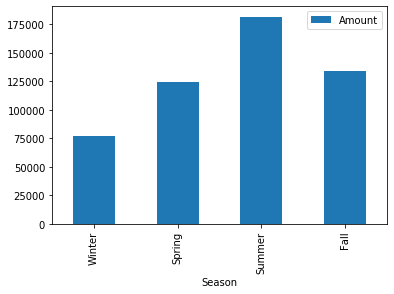

In [23]:
#simple plot for the bookings per season
data2015 = {'Season':['Winter', 'Spring', 'Summer', 'Fall'],
        'Amount':[77124, 124013, 181772 , 133696]}
data2015 = pd.DataFrame(data2015)
data2015.plot('Season', kind='bar')

In [24]:
#do the same for the year 2016

In [25]:
#2016
#December, January, February
start_date_dec_2016 = '2016-12-01 00:00:00'
end_date_dec_2016 = '2016-12-31 23:59:59'
filtered_dates_dec_2016 = (booking_set_frankfurt['DATE_BOOKING'] >= start_date_dec_2016) & (booking_set_frankfurt['DATE_BOOKING'] <= end_date_dec_2016) 
booking_set_frankfurt_dec_2016 = booking_set_frankfurt.loc[filtered_dates_dec_2016]
start_date_winter_2016 = '2016-01-01 00:00:00'
end_date_winter_2016 = '2016-02-29 23:59:59'
filtered_dates_winter_2016 = (booking_set_frankfurt['DATE_BOOKING'] >= start_date_winter_2016) & (booking_set_frankfurt['DATE_BOOKING'] <= end_date_winter_2016) 
booking_set_frankfurt_winter_2016 = booking_set_frankfurt.loc[filtered_dates_winter_2016]
booking_set_frankfurt_winter_2016
frames2 = [booking_set_frankfurt_dec_2016, booking_set_frankfurt_winter_2016]
winter_2016 = pd.concat(frames2)
winter_2016

,BOOKING_HAL_ID,DATE_BOOKING
14351578,43072015,2016-12-01 00:01:12
14346745,43072016,2016-12-01 00:01:15
14350998,43072028,2016-12-01 00:02:47
14348120,43072089,2016-12-01 00:12:28
14347478,43072100,2016-12-01 00:13:55
...,...,...
9403654,35850780,2016-02-29 23:43:39
9402767,35850797,2016-02-29 23:48:46
9403005,35850805,2016-02-29 23:51:12
9402768,35850812,2016-02-29 23:53:43


In [26]:
##March, April, Mai
start_date_spring_2016 = '2016-03-01 00:00:00'
end_date_spring_2016 = '2016-05-31 23:59:59'
filtered_dates_spring_2016 = (booking_set_frankfurt['DATE_BOOKING'] >= start_date_spring_2016) & (booking_set_frankfurt['DATE_BOOKING'] <= end_date_spring_2016)
booking_set_frankfurt_spring_2016 = booking_set_frankfurt.loc[filtered_dates_spring_2016]
booking_set_frankfurt_spring_2016

,BOOKING_HAL_ID,DATE_BOOKING
9401886,35850839,2016-03-01 00:05:27
9401087,35850909,2016-03-01 00:23:46
9402358,35850921,2016-03-01 00:29:03
9402409,35850926,2016-03-01 00:30:33
9404378,35850952,2016-03-01 00:40:43
...,...,...
10858213,38097229,2016-05-31 23:58:59
10858382,38097231,2016-05-31 23:59:09
10857852,38097232,2016-05-31 23:59:16
10859605,38097234,2016-05-31 23:59:44


In [27]:
##June, Juli, August
start_date_summer_2016 = '2016-06-01 00:00:00'
end_date_summer_2016 = '2016-08-31 23:59:59'
filtered_dates_summer_2016 = (booking_set_frankfurt['DATE_BOOKING'] >= start_date_summer_2016) & (booking_set_frankfurt['DATE_BOOKING'] <= end_date_summer_2016)
booking_set_frankfurt_summer_2016 = booking_set_frankfurt.loc[filtered_dates_summer_2016]
booking_set_frankfurt_summer_2016

,BOOKING_HAL_ID,DATE_BOOKING
10859600,38097243,2016-06-01 00:00:28
10859643,38097264,2016-06-01 00:02:35
10860449,38097282,2016-06-01 00:04:24
10857952,38097283,2016-06-01 00:04:27
10858114,38097284,2016-06-01 00:04:31
...,...,...
12891705,40894792,2016-08-31 23:57:32
12890129,40894793,2016-08-31 23:57:35
12891584,40894798,2016-08-31 23:57:54
12890434,40894819,2016-08-31 23:59:52


In [28]:
##September, October, November
start_date_fall_2016 = '2016-09-01 00:00:00'
end_date_fall_2016 = '2016-11-30 23:59:59'
filtered_dates_fall_2016 = (booking_set_frankfurt['DATE_BOOKING'] >= start_date_fall_2016) & (booking_set_frankfurt['DATE_BOOKING'] <= end_date_fall_2016)
booking_set_frankfurt_fall_2016 = booking_set_frankfurt.loc[filtered_dates_fall_2016]
booking_set_frankfurt_fall_2016

,BOOKING_HAL_ID,DATE_BOOKING
12888365,40894821,2016-09-01 00:00:02
12888976,40894835,2016-09-01 00:01:08
12896868,40894841,2016-09-01 00:01:32
12897793,40894850,2016-09-01 00:02:40
12890339,40894899,2016-09-01 00:07:02
...,...,...
14352023,43071937,2016-11-30 23:47:50
14347463,43071947,2016-11-30 23:49:09
14346902,43071965,2016-11-30 23:52:11
14345952,43071979,2016-11-30 23:54:41


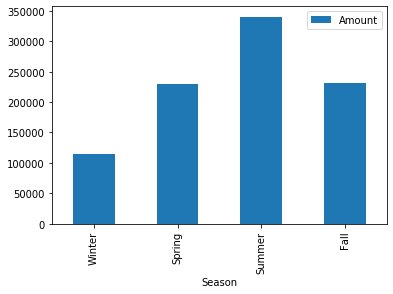

In [29]:
#simple plot for the bookings per season 2016
data2016 = {'Season':['Winter', 'Spring', 'Summer', 'Fall'],
        'Amount':[114410, 228803, 340352, 231473]}
data2016 = pd.DataFrame(data2016)
data2016.plot('Season', kind='bar')

## Amount of bookings in respect to the week days


In [30]:
#group bookings by the day of week in the year 2015
hours_size_2015 = booking_set_frankfurt_2015.groupby(booking_set_frankfurt_2015['DATE_BOOKING'].dt.weekday_name).size()

In [31]:
hours_size_2015

DATE_BOOKING
Friday       80186
Monday       75581
Saturday     54597
Sunday       48097
Thursday     84268
Tuesday      84773
Wednesday    89103
dtype: int64

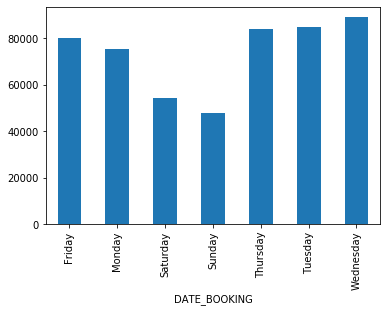

In [32]:
hours_size_2015.plot(kind='bar')

In [33]:
#group bookings by the day of week in the year 2016
hours_size_2016 = booking_set_frankfurt_2016.groupby(booking_set_frankfurt_2016['DATE_BOOKING'].dt.weekday_name).size()

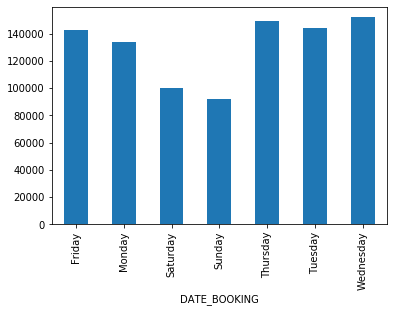

In [34]:
hours_size_2016.plot(kind='bar')

## Amount of bookings for the different hours during the day

### Bookings per hour/day 2015

In [35]:
#2015 #bookings per hours the day
hours_day_2015 = booking_set_frankfurt_2015.groupby(booking_set_frankfurt_2015['DATE_BOOKING'].dt.hour).size()

In [36]:
hours_day_2015

DATE_BOOKING
0      8928
1      8431
2      6252
3      4281
4      2423
5      2818
6      7045
7     25520
8     44169
9     27011
10    17914
11    21480
12    28363
13    28429
14    25298
15    29197
16    35486
17    41593
18    42283
19    34412
20    25835
21    19866
22    16836
23    12735
dtype: int64

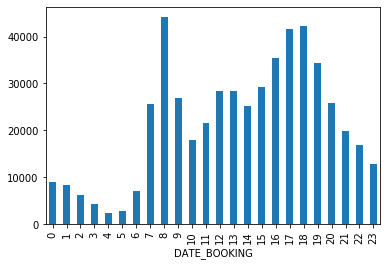

In [37]:
hours_day_2015.plot(kind='bar')

In [38]:
#2015 get the different time formats out of the date booking
booking_set_frankfurt_2015['year'] = booking_set_frankfurt_2015['DATE_BOOKING'].dt.strftime('%Y')
booking_set_frankfurt_2015['month'] = booking_set_frankfurt_2015['DATE_BOOKING'].dt.strftime('%b')
booking_set_frankfurt_2015['date'] = booking_set_frankfurt_2015['DATE_BOOKING'].dt.strftime('%d')
booking_set_frankfurt_2015['hour'] = booking_set_frankfurt_2015['DATE_BOOKING'].dt.strftime('%H')
booking_set_frankfurt_2015['Day_of_week'] = booking_set_frankfurt_2015['DATE_BOOKING'].dt.strftime('%a')

In [39]:
new_booking_set_frankfurt_2015 = booking_set_frankfurt_2015.loc[:,['BOOKING_HAL_ID', 'Day_of_week', 'hour']]

In [40]:
#now get it in a nice dispay py pivoting the table
pd.set_option('display.max_columns', 24)
res = new_booking_set_frankfurt_2015.groupby(['Day_of_week', 'hour'], as_index = False).count()

### Table of booking Amount for the hours of the week days (2015)

In [41]:
#make day_of_week to index
#hour schould be new column 
res.pivot(index='Day_of_week', columns='hour', values='BOOKING_HAL_ID')

hour,00,01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Day_of_week,,,,,,,,,,,,,,,,,,,,,,,,
Fri,1385,1274,934,559,265,366,1220,4503,7896,4484,2604,3374,4607,4840,4182,4648,5605,6239,5721,4625,3582,2800,2341,2132
Mon,703,466,209,113,84,304,1221,4415,7677,4434,2639,2964,3940,3866,3210,4072,5475,6541,6982,5591,3972,3000,2282,1421
Sat,1925,2216,1905,1404,814,514,360,559,1031,1794,2411,2711,3204,3700,3586,3591,3262,3627,3448,3340,2995,2334,2046,1820
Sun,1861,2274,1936,1417,843,586,325,401,594,1290,1792,2078,2532,2832,3269,3356,3385,3483,3423,3157,2394,1981,1674,1214
Thu,1291,991,616,434,230,381,1191,4855,8555,4673,2745,3342,4651,4265,3733,4659,5870,7017,7185,5363,4185,3072,2808,2156
Tue,763,495,276,148,82,329,1301,5448,8994,5019,2798,3489,4576,4307,3538,4270,5775,7195,7716,6159,4361,3209,2696,1829
Wed,1000,715,376,206,105,338,1427,5339,9422,5317,2925,3522,4853,4619,3780,4601,6114,7491,7808,6177,4346,3470,2989,2163


### Amount of bookings for the hours of the day (2016)

In [42]:
#2016 #gesamte Stunden in der Woche
hours_day_2016 = booking_set_frankfurt_2016.groupby(booking_set_frankfurt_2016['DATE_BOOKING'].dt.hour).size()

In [43]:
hours_day_2016

DATE_BOOKING
0     16041
1     13891
2      9935
3      6296
4      4028
5      4655
6     11871
7     41964
8     74818
9     47164
10    30976
11    37808
12    49164
13    51004
14    46584
15    52091
16    61370
17    74800
18    77994
19    63420
20    48558
21    36674
22    30323
23    23609
dtype: int64

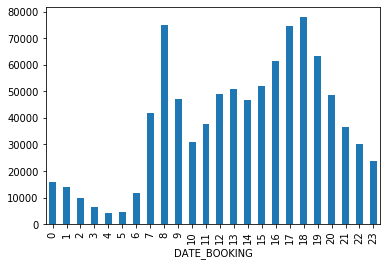

In [44]:
hours_day_2016.plot(kind='bar')

In [45]:
#the same procedure for 2016
booking_set_frankfurt_2016['year'] = booking_set_frankfurt_2016['DATE_BOOKING'].dt.strftime('%Y')
booking_set_frankfurt_2016['month'] = booking_set_frankfurt_2016['DATE_BOOKING'].dt.strftime('%b')
booking_set_frankfurt_2016['date'] = booking_set_frankfurt_2016['DATE_BOOKING'].dt.strftime('%d')
booking_set_frankfurt_2016['hour'] = booking_set_frankfurt_2016['DATE_BOOKING'].dt.strftime('%H')
booking_set_frankfurt_2016['Day_of_week'] = booking_set_frankfurt_2016['DATE_BOOKING'].dt.strftime('%a')

new_booking_set_frankfurt_2016 = booking_set_frankfurt_2016.loc[:,['BOOKING_HAL_ID', 'Day_of_week', 'hour']]

res2 = new_booking_set_frankfurt_2016.groupby(['Day_of_week', 'hour'], as_index = False).count()

### Table of bookings for the different hours of the week days (2016)

In [46]:
res2.pivot(index='Day_of_week', columns='hour', values='BOOKING_HAL_ID')

hour,00,01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Day_of_week,,,,,,,,,,,,,,,,,,,,,,,,
Fri,2523,2018,1312,790,433,634,1941,7443,13206,7988,4631,6064,8123,8218,7415,8513,10053,11153,10711,8546,6898,5350,4605,4052
Mon,1192,789,399,197,173,553,1856,7225,13083,7757,4662,5164,6769,7072,6144,7362,9323,11902,13074,10129,7377,5453,3960,2683
Sat,3645,3841,3021,2031,1326,852,584,989,1915,3200,4127,5116,6103,6682,6987,6805,6211,6879,6827,6406,5473,4373,3590,3477
Sun,3480,3901,3281,2254,1473,958,559,694,1183,2429,3441,4051,4871,5928,6392,6657,6609,7066,6769,6194,4950,3811,3039,2163
Thu,2111,1381,865,522,315,547,2211,7925,14405,8610,4803,5860,8151,8010,6876,7916,9766,12466,13365,10413,7662,5835,4946,4190
Tue,1427,869,486,225,152,545,2265,8768,15139,8370,4452,5575,7380,7487,6368,7302,9703,12318,13402,10618,7715,5817,4767,3141
Wed,1663,1092,571,277,156,566,2455,8920,15887,8810,4860,5978,7767,7607,6402,7536,9705,13016,13846,11114,8483,6035,5416,3903


## Comparison of the amount of bookings per month in 2015/2016

In [47]:
booking_months1 = booking_set_frankfurt_2015.loc[:,['BOOKING_HAL_ID', 'month']]
firstyear = booking_months1.groupby(["month"], as_index = False).count()
booking_months2 = booking_set_frankfurt_2016.loc[:,['BOOKING_HAL_ID', 'month']]
secondyear = booking_months2.groupby(["month"], as_index = False).count()

In [48]:
#this is needed to sort the table after the days of the week
sorter = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sorterIndex = dict(zip(sorter,range(len(sorter))))
firstyear['Day_id'] = firstyear.index
firstyear['Day_id'] = firstyear['month'].map(sorterIndex)
firstyear.sort_values('Day_id', inplace=True)

In [49]:
#this is needed to sort the table after the days of the week
sorter = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sorterIndex = dict(zip(sorter,range(len(sorter))))
secondyear['Day_id'] = secondyear.index
secondyear['Day_id'] = secondyear['month'].map(sorterIndex)
secondyear.sort_values('Day_id', inplace=True)

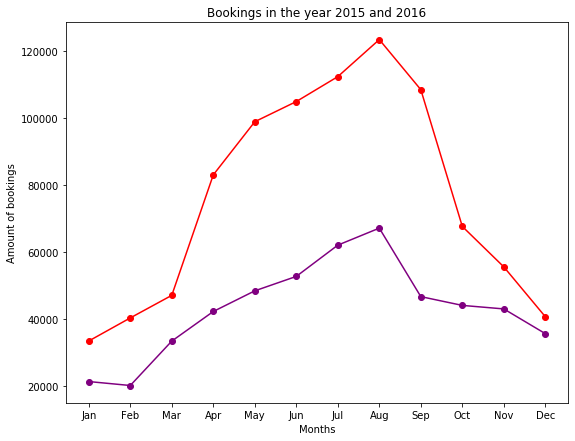

In [50]:
#this plot shows the bikes at the main train station that are leaving in violet and that are arriving in red
# Create the plot space upon which to plot the data 
fig, ax = plt.subplots(figsize=(9, 7))

# Add the x-axis and the y-axis to the plot
ax.plot(firstyear['month'],
        firstyear['BOOKING_HAL_ID'], '-o',
        color='purple')

ax.plot(secondyear['month'],
        secondyear['BOOKING_HAL_ID'], '-o',
        color='red')
# Set title and labels for axes
ax.set(xlabel="Months",
       ylabel="Amount of bookings",
       title="Bookings in the year 2015 and 2016")
plt.show()

## Average duration of bookings

In [51]:
#this goes for both years
#furst get the dates
booking_set = pd.read_csv("OPENDATA_BOOKING_CALL_A_BIKE.csv", delimiter=';')

booking_set_frankfurt = booking_set[booking_set['CITY_RENTAL_ZONE'].str.contains('Frankfurt')]

booking_set_frankfurt.sort_values(['DATE_BOOKING'], axis=0, 
                 ascending=True, inplace=True) #sort the data after the date, ascending
booking_set_frankfurt['DATE_BOOKING'] = pd.to_datetime(booking_set_frankfurt['DATE_BOOKING'])
booking_set_frankfurt['DATE_BOOKING'].dt.strftime('%Y-%m-%d %X')
start_date_20152016 = '2015-01-01 00:00:00'
end_date_20152016 = '2016-12-31 23:59:59'
filtered_dates_20152016 = (booking_set_frankfurt['DATE_BOOKING'] >= start_date_20152016) & (booking_set_frankfurt['DATE_BOOKING'] <= end_date_20152016)
booking_set_frankfurt_20152016 = booking_set_frankfurt.loc[filtered_dates_20152016]

In [52]:
booking_set_frankfurt_20152016['DATE_UNTIL'] = pd.to_datetime(booking_set_frankfurt_20152016['DATE_UNTIL'])
booking_set_frankfurt_20152016['DATE_UNTIL'].dt.strftime('%Y-%m-%d %X')
booking_set_frankfurt_20152016['DATE_FROM'] = pd.to_datetime(booking_set_frankfurt_20152016['DATE_FROM'])
booking_set_frankfurt_20152016['DATE_FROM'].dt.strftime('%Y-%m-%d %X')

4285336     2015-01-01 00:30:20
4285873     2015-01-01 00:42:51
4286542     2015-01-01 01:00:19
4286567     2015-01-01 01:00:47
4286706     2015-01-01 01:00:58
                   ...         
14613160    2016-12-31 23:13:00
14613511    2016-12-31 23:23:28
14612056    2016-12-31 23:24:03
14615815    2016-12-31 23:28:04
14612244    2016-12-31 23:40:33
Name: DATE_FROM, Length: 1065790, dtype: object

In [53]:
booking_set_frankfurt_20152016['duration'] = booking_set_frankfurt_20152016['DATE_UNTIL'] - booking_set_frankfurt_20152016['DATE_FROM']

### Amount of bookings below a certain minute limit

In [54]:
#run this through multiple times by changing the minute count to get the hard coded result below
duration_oneminute = booking_set_frankfurt_20152016[booking_set_frankfurt_20152016.duration < '00:05:00']
print(duration_oneminute.shape)

(121523, 18)


Amount of bikes that are under certain amount of minutes duration:

Hardcoded result from before: 
1. 1 Minute: 5412
2. 2 Minutes: 21464
3. 3 Minutes: 44362
4. 4 Minutes: 94586
5. 5 Minutes: 166839

### Amount of bookings above a certain day limit

In [55]:
#same as before
duration_oneday = booking_set_frankfurt_20152016[booking_set_frankfurt_20152016.duration > '14 days 00:00:00']
print(duration_oneday.shape)

(22, 18)


Hardcoded: Amount of bikes that are over a certain amount of days duration:
1. 1 Day: 3115
2. 2 Days: 1159
3. 3 Days: 661
4. 4 Days: 440
5. Days: 323
6. Days: 239
7. Days: 198
8. Days: 162
9. Days: 146
10. Days: 136
11. Days: 125
12. Days: 109
13. Days: 98
14. Days: 94

In [56]:
booking_set_frankfurt_20152016['year'] = booking_set_frankfurt_20152016['DATE_BOOKING'].dt.strftime('%Y')
booking_set_frankfurt_20152016['month'] = booking_set_frankfurt_20152016['DATE_BOOKING'].dt.strftime('%b')
booking_set_frankfurt_20152016['date'] = booking_set_frankfurt_20152016['DATE_BOOKING'].dt.strftime('%d')
booking_set_frankfurt_20152016['hour'] = booking_set_frankfurt_20152016['DATE_BOOKING'].dt.strftime('%H')
booking_set_frankfurt_20152016['Day_of_week'] = booking_set_frankfurt_20152016['DATE_BOOKING'].dt.strftime('%a')

In [57]:
booking_duration = booking_set_frankfurt_20152016.loc[:,['BOOKING_HAL_ID', 'Day_of_week', 'hour', 'duration']]
booking_duration

,BOOKING_HAL_ID,Day_of_week,hour,duration
4285336,27689041,Thu,00,0 days 00:11:32
4285873,27689080,Thu,00,0 days 00:25:58
4286542,27689151,Thu,01,0 days 00:11:00
4286567,27689154,Thu,01,0 days 00:10:33
4286706,27689156,Thu,01,0 days 00:10:34
...,...,...,...,...
14613160,43561784,Sat,23,1 days 09:08:32
14613511,43561828,Sat,23,0 days 00:22:31
14612056,43561832,Sat,23,0 days 00:08:47
14615815,43561863,Sat,23,0 days 00:05:21


### Mean duration for the week days

In [58]:
booking_duration['duration'] = pd.to_numeric(booking_duration['duration'])
booking_duration_mean = booking_duration.groupby(["Day_of_week"], as_index = False)['duration'].mean()
booking_duration_mean['duration'] = pd.to_timedelta(booking_duration_mean['duration'])
booking_duration_mean

,Day_of_week,duration
0,Fri,00:23:17.324271
1,Mon,00:22:14.051366
2,Sat,00:31:53.524711
3,Sun,00:31:23.979565
4,Thu,00:22:50.694238
5,Tue,00:21:44.032327
6,Wed,00:23:23.007902


In [59]:
#this is needed to sort the table after the days of the week
sorter = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sorterIndex = dict(zip(sorter,range(len(sorter))))
booking_duration_mean['Day_id'] = booking_duration_mean.index
booking_duration_mean['Day_id'] = booking_duration_mean['Day_of_week'].map(sorterIndex)
booking_duration_mean.sort_values('Day_id', inplace=True)

In [60]:
booking_duration_mean

,Day_of_week,duration,Day_id
1,Mon,00:22:14.051366,0
5,Tue,00:21:44.032327,1
6,Wed,00:23:23.007902,2
4,Thu,00:22:50.694238,3
0,Fri,00:23:17.324271,4
2,Sat,00:31:53.524711,5
3,Sun,00:31:23.979565,6


In [61]:
#round the time to make it better for plotting
booking_duration_mean['duration']  = round(booking_duration_mean['duration'].dt.total_seconds()/60)

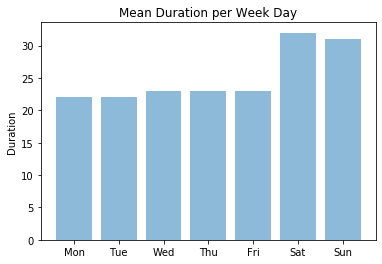

In [62]:
#plot for the mean duration per week day
y_pos = np.arange(len(booking_duration_mean['Day_of_week']))
plt.bar(y_pos, booking_duration_mean['duration'], align='center', alpha=0.5)
plt.xticks(y_pos, booking_duration_mean['Day_of_week'])
plt.ylabel('Duration')
plt.title('Mean Duration per Week Day')

plt.show()

### mean duration for the different hours a day

In [63]:
#Now do the same process for hours of the day

In [64]:
booking_duration = booking_set_frankfurt_20152016.loc[:,['BOOKING_HAL_ID', 'Day_of_week', 'hour', 'duration']]
booking_duration

,BOOKING_HAL_ID,Day_of_week,hour,duration
4285336,27689041,Thu,00,0 days 00:11:32
4285873,27689080,Thu,00,0 days 00:25:58
4286542,27689151,Thu,01,0 days 00:11:00
4286567,27689154,Thu,01,0 days 00:10:33
4286706,27689156,Thu,01,0 days 00:10:34
...,...,...,...,...
14613160,43561784,Sat,23,1 days 09:08:32
14613511,43561828,Sat,23,0 days 00:22:31
14612056,43561832,Sat,23,0 days 00:08:47
14615815,43561863,Sat,23,0 days 00:05:21


In [65]:
booking_duration['duration'] = pd.to_numeric(booking_duration['duration'])
booking_duration_mean = booking_duration.groupby(["hour"], as_index = False)['duration'].mean()
booking_duration_mean['duration'] = pd.to_timedelta(booking_duration_mean['duration'])
booking_duration_mean

,hour,duration
0,00,00:23:09.706172
1,01,00:27:10.147575
2,02,00:23:20.467755
3,03,00:26:29.759061
4,04,00:27:01.097902
5,05,00:19:26.498531
6,06,00:19:22.829568
7,07,00:17:42.703796
8,08,00:18:57.869356
9,09,00:19:59.104385


In [66]:
booking_duration_mean['duration']  = round(booking_duration_mean['duration'].dt.total_seconds()/60)

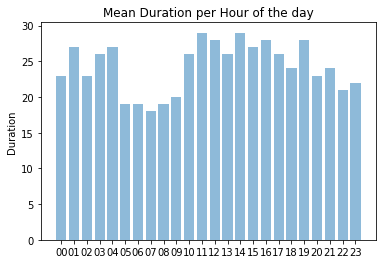

In [67]:
#plot for the mean duration per week day
y_pos = np.arange(len(booking_duration_mean['hour']))
plt.bar(y_pos, booking_duration_mean['duration'], align='center', alpha=0.5)
plt.xticks(y_pos, booking_duration_mean['hour'])
plt.ylabel('Duration')
plt.title('Mean Duration per Hour of the day')

plt.show()

### Duration for the different seasons

In [3]:
#this goes for both years
#furst get the dates
booking_set = pd.read_csv("OPENDATA_BOOKING_CALL_A_BIKE.csv", delimiter=';')

booking_set_frankfurt = booking_set[booking_set['CITY_RENTAL_ZONE'].str.contains('Frankfurt')]

booking_set_frankfurt.sort_values(['DATE_BOOKING'], axis=0, 
                 ascending=True, inplace=True) #sort the data after the date, ascending
booking_set_frankfurt['DATE_BOOKING'] = pd.to_datetime(booking_set_frankfurt['DATE_BOOKING'])
booking_set_frankfurt['DATE_BOOKING'].dt.strftime('%Y-%m-%d %X')
start_date_20152016 = '2015-01-01 00:00:00'
end_date_20152016 = '2016-12-31 23:59:59'
filtered_dates_20152016 = (booking_set_frankfurt['DATE_BOOKING'] >= start_date_20152016) & (booking_set_frankfurt['DATE_BOOKING'] <= end_date_20152016)
booking_set_frankfurt_20152016 = booking_set_frankfurt.loc[filtered_dates_20152016]

In [4]:
booking_set_frankfurt_20152016['DATE_UNTIL'] = pd.to_datetime(booking_set_frankfurt_20152016['DATE_UNTIL'])
booking_set_frankfurt_20152016['DATE_UNTIL'].dt.strftime('%Y-%m-%d %X')
booking_set_frankfurt_20152016['DATE_FROM'] = pd.to_datetime(booking_set_frankfurt_20152016['DATE_FROM'])
booking_set_frankfurt_20152016['DATE_FROM'].dt.strftime('%Y-%m-%d %X')

4284612     2015-01-01 00:21:22
4285336     2015-01-01 00:30:20
4285873     2015-01-01 00:42:51
4286542     2015-01-01 01:00:19
4286567     2015-01-01 01:00:47
                   ...         
14613160    2016-12-31 23:13:00
14613511    2016-12-31 23:23:28
14612056    2016-12-31 23:24:03
14615815    2016-12-31 23:28:04
14612244    2016-12-31 23:40:33
Name: DATE_FROM, Length: 1431643, dtype: object

In [5]:
booking_set_frankfurt_20152016['duration'] = booking_set_frankfurt_20152016['DATE_UNTIL'] - booking_set_frankfurt_20152016['DATE_FROM']
booking_duration = booking_set_frankfurt_20152016.loc[:,['BOOKING_HAL_ID', 'DATE_BOOKING', 'duration']]

In [7]:
booking_duration

,BOOKING_HAL_ID,DATE_BOOKING,duration
4284612,27689006,2015-01-01 00:21:22,0 days 00:03:56
4285336,27689041,2015-01-01 00:30:20,0 days 00:11:32
4285873,27689080,2015-01-01 00:42:51,0 days 00:25:58
4286542,27689151,2015-01-01 01:00:19,0 days 00:11:00
4286567,27689154,2015-01-01 01:00:47,0 days 00:10:33
...,...,...,...
14613160,43561784,2016-12-31 23:13:00,1 days 09:08:32
14613511,43561828,2016-12-31 23:23:28,0 days 00:22:31
14612056,43561832,2016-12-31 23:24:03,0 days 00:08:47
14615815,43561863,2016-12-31 23:28:04,0 days 00:05:21


In [8]:
#winter
start_date1 = '2015-01-01 00:00:00'
end_date1 = '2015-02-28 23:59:59'
filtered_dates_winter_one = (booking_duration['DATE_BOOKING'] >= start_date1) & (booking_duration['DATE_BOOKING'] <= end_date1) 
booking_set_frankfurt_winter_one = booking_duration.loc[filtered_dates_winter_one]
booking_set_frankfurt_winter_one

,BOOKING_HAL_ID,DATE_BOOKING,duration
4284612,27689006,2015-01-01 00:21:22,00:03:56
4285336,27689041,2015-01-01 00:30:20,00:11:32
4285873,27689080,2015-01-01 00:42:51,00:25:58
4286542,27689151,2015-01-01 01:00:19,00:11:00
4286567,27689154,2015-01-01 01:00:47,00:10:33
...,...,...,...
4613551,28356046,2015-02-28 23:25:03,00:20:24
4616225,28356058,2015-02-28 23:26:35,00:08:32
4616709,28356074,2015-02-28 23:30:21,00:12:58
4616246,28356112,2015-02-28 23:38:01,00:19:42


In [9]:
#winter
start_date2 = '2015-12-01 00:00:00'
end_date2 = '2016-02-29 23:59:59'
filtered_dates_winter_two = (booking_duration['DATE_BOOKING'] >= start_date2) & (booking_duration['DATE_BOOKING'] <= end_date2) 
booking_set_frankfurt_winter_two = booking_duration.loc[filtered_dates_winter_two]
booking_set_frankfurt_winter_two

,BOOKING_HAL_ID,DATE_BOOKING,duration
8627664,34451014,2015-12-01 00:01:14,00:12:57
8628529,34451039,2015-12-01 00:05:35,00:07:10
8627485,34451050,2015-12-01 00:07:01,00:03:42
8627189,34451051,2015-12-01 00:07:05,00:11:52
8628465,34451064,2015-12-01 00:08:25,00:13:56
...,...,...,...
9403654,35850780,2016-02-29 23:43:39,00:20:30
9402767,35850797,2016-02-29 23:48:46,00:19:06
9403005,35850805,2016-02-29 23:51:12,00:11:14
9402768,35850812,2016-02-29 23:53:43,00:07:47


In [11]:
#winter
start_date3 = '2016-12-01 00:00:00'
end_date3 = '2016-12-31 23:59:59'
filtered_dates_winter_three = (booking_duration['DATE_BOOKING'] >= start_date3) & (booking_duration['DATE_BOOKING'] <= end_date3) 
booking_set_frankfurt_winter_three = booking_duration.loc[filtered_dates_winter_three]
booking_set_frankfurt_winter_three

,BOOKING_HAL_ID,DATE_BOOKING,duration
14351578,43072015,2016-12-01 00:01:12,0 days 00:03:10
14346745,43072016,2016-12-01 00:01:15,0 days 00:05:42
14350998,43072028,2016-12-01 00:02:47,0 days 00:09:45
14348120,43072089,2016-12-01 00:12:28,0 days 00:06:31
14347478,43072100,2016-12-01 00:13:55,0 days 00:02:24
...,...,...,...
14613160,43561784,2016-12-31 23:13:00,1 days 09:08:32
14613511,43561828,2016-12-31 23:23:28,0 days 00:22:31
14612056,43561832,2016-12-31 23:24:03,0 days 00:08:47
14615815,43561863,2016-12-31 23:28:04,0 days 00:05:21


In [12]:
#winter
frames = [booking_set_frankfurt_winter_one, booking_set_frankfurt_winter_two, booking_set_frankfurt_winter_three]
winter = pd.concat(frames)

In [15]:
winter['duration'] = pd.to_numeric(winter['duration'])
winter_duration_mean = winter['duration'].mean()
winter_duration_mean = pd.to_timedelta(winter_duration_mean)
winter_duration_mean

Timedelta('0 days 00:33:09.589582')

In [ ]:
#spring

In [16]:
start_date1 = '2015-03-01 00:00:00'
end_date1 = '2015-05-31 23:59:59'
filtered_dates_spring_one = (booking_duration['DATE_BOOKING'] >= start_date1) & (booking_duration['DATE_BOOKING'] <= end_date1) 
booking_set_frankfurt_spring_one = booking_duration.loc[filtered_dates_spring_one]
booking_set_frankfurt_spring_one

,BOOKING_HAL_ID,DATE_BOOKING,duration
4613273,28356212,2015-03-01 00:00:11,00:19:50
4613211,28356262,2015-03-01 00:11:22,00:12:17
4612966,28356281,2015-03-01 00:16:26,00:40:47
4614362,28356284,2015-03-01 00:16:58,00:05:12
4612668,28356309,2015-03-01 00:21:41,00:11:31
...,...,...,...
5735664,30141540,2015-05-31 23:46:10,00:19:02
5740159,30141566,2015-05-31 23:51:55,00:14:36
5732560,30141571,2015-05-31 23:53:12,00:19:20
5735701,30141576,2015-05-31 23:54:01,00:08:40


In [18]:
start_date2 = '2016-03-01 00:00:00'
end_date2 = '2016-05-31 23:59:59'
filtered_dates_spring_two = (booking_duration['DATE_BOOKING'] >= start_date1) & (booking_duration['DATE_BOOKING'] <= end_date1) 
booking_set_frankfurt_spring_two = booking_duration.loc[filtered_dates_spring_two]
booking_set_frankfurt_spring_two

,BOOKING_HAL_ID,DATE_BOOKING,duration
4613273,28356212,2015-03-01 00:00:11,00:19:50
4613211,28356262,2015-03-01 00:11:22,00:12:17
4612966,28356281,2015-03-01 00:16:26,00:40:47
4614362,28356284,2015-03-01 00:16:58,00:05:12
4612668,28356309,2015-03-01 00:21:41,00:11:31
...,...,...,...
5735664,30141540,2015-05-31 23:46:10,00:19:02
5740159,30141566,2015-05-31 23:51:55,00:14:36
5732560,30141571,2015-05-31 23:53:12,00:19:20
5735701,30141576,2015-05-31 23:54:01,00:08:40


In [27]:
#spring
frames = [booking_set_frankfurt_spring_one, booking_set_frankfurt_spring_two]
spring = pd.concat(frames)

In [28]:
spring['duration'] = pd.to_numeric(spring['duration'])
spring_duration_mean = spring['duration'].mean()
spring_duration_mean = pd.to_timedelta(spring_duration_mean)
spring_duration_mean

Timedelta('0 days 00:25:57.272342')

In [ ]:
#summer

In [21]:
start_date1 = '2015-06-01 00:00:00'
end_date1 = '2015-08-31 23:59:59'
filtered_dates_summer_one = (booking_duration['DATE_BOOKING'] >= start_date1) & (booking_duration['DATE_BOOKING'] <= end_date1) 
booking_set_frankfurt_summer_one = booking_duration.loc[filtered_dates_summer_one]
booking_set_frankfurt_summer_one

,BOOKING_HAL_ID,DATE_BOOKING,duration
5734026,30141616,2015-06-01 00:02:22,00:06:43
5735467,30141637,2015-06-01 00:05:41,00:10:42
5739521,30141638,2015-06-01 00:06:14,00:06:55
5736218,30141639,2015-06-01 00:06:14,00:16:03
5736382,30141658,2015-06-01 00:10:44,00:08:22
...,...,...,...
7469969,32604746,2015-08-31 23:53:50,00:22:52
7463229,32604748,2015-08-31 23:53:53,00:17:22
7464666,32604784,2015-08-31 23:57:46,00:12:11
7463743,32604788,2015-08-31 23:58:15,00:13:46


In [22]:
start_date2 = '2016-06-01 00:00:00'
end_date2 = '2016-08-31 23:59:59'
filtered_dates_summer_two = (booking_duration['DATE_BOOKING'] >= start_date2) & (booking_duration['DATE_BOOKING'] <= end_date2) 
booking_set_frankfurt_summer_two = booking_duration.loc[filtered_dates_summer_two]
booking_set_frankfurt_summer_two

,BOOKING_HAL_ID,DATE_BOOKING,duration
10859600,38097243,2016-06-01 00:00:28,00:24:10
10859643,38097264,2016-06-01 00:02:35,00:09:05
10860449,38097282,2016-06-01 00:04:24,00:20:18
10857952,38097283,2016-06-01 00:04:27,00:14:14
10858114,38097284,2016-06-01 00:04:31,00:20:21
...,...,...,...
12891705,40894792,2016-08-31 23:57:32,00:10:58
12890129,40894793,2016-08-31 23:57:35,00:09:46
12891584,40894798,2016-08-31 23:57:54,00:27:46
12890434,40894819,2016-08-31 23:59:52,00:17:45


In [36]:
frames = [booking_set_frankfurt_summer_one, booking_set_frankfurt_summer_two]
summer = pd.concat(frames)

In [26]:
summer['duration'] = pd.to_numeric(summer['duration'])
summer_duration_mean = summer['duration'].mean()
summer_duration_mean = pd.to_timedelta(summer_duration_mean)
summer_duration_mean

Timedelta('0 days 00:30:21.171641')

In [ ]:
#fall

In [30]:
start_date1 = '2015-09-01 00:00:00'
end_date1 = '2015-11-30 23:59:59'
filtered_dates_fall_one = (booking_duration['DATE_BOOKING'] >= start_date1) & (booking_duration['DATE_BOOKING'] <= end_date1) 
booking_set_frankfurt_fall_one = booking_duration.loc[filtered_dates_fall_one]

In [31]:
start_date2 = '2016-09-01 00:00:00'
end_date2 = '2016-11-30 23:59:59'
filtered_dates_fall_two = (booking_duration['DATE_BOOKING'] >= start_date2) & (booking_duration['DATE_BOOKING'] <= end_date2) 
booking_set_frankfurt_fall_two = booking_duration.loc[filtered_dates_fall_two]

In [34]:
frames = [booking_set_frankfurt_fall_one, booking_set_frankfurt_fall_two]
fall = pd.concat(frames)

In [35]:
fall['duration'] = pd.to_numeric(fall['duration'])
fall_duration_mean = fall['duration'].mean()
fall_duration_mean = pd.to_timedelta(fall_duration_mean)
fall_duration_mean

Timedelta('0 days 00:38:44.310689')

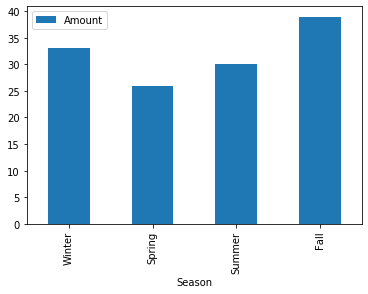

In [41]:
#simple plot for the bookings per season
seasons = {'Season':['Winter', 'Spring', 'Summer', 'Fall'],
        'Amount':[winter_duration_mean, spring_duration_mean, summer_duration_mean , fall_duration_mean]}
seasons = pd.DataFrame(seasons)
seasons['Amount']  = round(seasons['Amount'].dt.total_seconds()/60)
seasons.plot('Season', kind='bar')

# Routes

In [68]:
booking_set_frankfurt.dropna() #remove NaN cause those lines wont give us anything here

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,COMPUTE_EXTRA_BOOKING_FEE,TRAVERSE_USE,DISTANCE,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL
17,21367245,50000,108136,52F601C735727653A8113E8AD5AC52E3BF89B492,2014-01-01 02:34:11,2014-01-01 02:34:11,2014-01-01 02:55:57,Nein,Nein,0.0,Carlo-Schmidt-Platz / Depot,214448.0,Rosa-Luxemburg-Straße / Ginnheimer Landstraße,231648.0,Standort,Frankfurt am Main,IVR
1706,21367386,50000,116907,5FB15874F8482B96D738225F24B27D4511A56D12,2014-01-01 03:07:37,2014-01-01 03:07:37,2014-01-01 03:15:13,Nein,Nein,0.0,Taunusstraße / Gallusanlage,28951.0,Opernplatz / Bockenheimer Landstaße,214376.0,Standort,Frankfurt am Main,IVR
340,21367759,50000,116510,5463C4A315BB2D2E0840FC24238727EDF6A8543B,2014-01-01 04:34:30,2014-01-01 04:34:30,2014-01-01 04:45:11,Nein,Nein,0.0,Dormero-Hotel / Europaallee,7596.0,Studierendenhaus Jügelstraße / Mertonstraße,23722.0,Standort,Frankfurt am Main,IVR
3093,21371429,50000,116614,C7478B24D91919C541442924123C8A21C07C950E,2014-01-01 20:19:22,2014-01-01 20:19:22,2014-01-01 20:35:28,Nein,Nein,0.0,Roßmarkt / An der Hauptwache,214380.0,Roßmarkt / An der Hauptwache,214380.0,Standort,Frankfurt am Main,IVR
3662,21372159,50000,116401,A9604235543BC897F7D19CE46C73E867DE58F4F5,2014-01-02 05:15:28,2014-01-02 05:15:28,2014-01-02 05:49:29,Nein,Nein,0.0,Leonardo-da-Vinci-Allee / Am Römerhof,226256.0,Pfarrer-Perabo-Platz / Kleyerstraße,214454.0,Standort,Frankfurt am Main,Android CAB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16227459,46386545,50000,164398,6242697E27DA067976F613CF1C277DD3106B3F7F,2017-05-16 08:03:16,2017-05-16 08:03:16,2017-05-16 08:08:35,Ja,Nein,0.0,Haltestelle Rennbahn,254658.0,Universitätsklinikum Parkhaus / Sandhofstraße,232342.0,Standort,Frankfurt am Main,iPhone CAB
16227836,46386553,50000,165797,C46839DD56DD6098F79972E42F2A88AC9201B372,2017-05-16 08:03:26,2017-05-16 08:03:26,2017-05-16 08:11:02,Ja,Nein,0.0,Ludwigstraße / Niddastraße,257268.0,Adlerwerke Kleyerstrasse / Kriegkstrasse,214455.0,Standort,Frankfurt am Main,Android CAB
16226977,46386569,50000,164846,B1DB7A4BCA9FD67122EDF740238F7D55C8BE4BE5,2017-05-16 08:03:47,2017-05-16 08:03:47,2017-05-16 08:08:04,Ja,Nein,0.0,Ludwigstraße / Niddastraße,257268.0,DB Rent-Zentrale / Mainzer Landstr. 169,227495.0,Standort,Frankfurt am Main,Android CAB
16228198,46386568,50000,163968,1D5AA97408E7303CB1DBEE06CBD8E64E074C1EC2,2017-05-16 08:03:47,2017-05-16 08:03:47,2017-05-16 08:09:46,Ja,Nein,0.0,Ackermannstraße / Cordierstraße,250938.0,Adlerwerke Kleyerstrasse / Kriegkstrasse,214455.0,Standort,Frankfurt am Main,iPhone CAB


In [69]:
#use vehicle hal id to see how many vehicles are at one station at a time 
booking_set_frankfurt['VEHICLE_HAL_ID'].nunique()

3688

In [70]:
booking_set_frankfurt['VEHICLE_HAL_ID'].unique() #gives out the vehicle ids in array form 

array([108136, 116907, 116510, ..., 110012, 165108, 164146], dtype=int64)

In [71]:
#again change to the required dates
booking_set_frankfurt.sort_values(['DATE_BOOKING'], axis=0, 
                 ascending=True, inplace=True) #sort the data after the date, ascending
booking_set_frankfurt['DATE_BOOKING'] = pd.to_datetime(booking_set_frankfurt['DATE_BOOKING'])
booking_set_frankfurt['DATE_BOOKING'].dt.strftime('%Y-%m-%d %X')
start_date_20152016 = '2015-01-01 00:00:00'
end_date_20152016 = '2016-12-31 23:59:59'
filtered_dates_20152016 = (booking_set_frankfurt['DATE_BOOKING'] >= start_date_20152016) & (booking_set_frankfurt['DATE_BOOKING'] <= end_date_20152016)
booking_set_frankfurt_20152016 = booking_set_frankfurt.loc[filtered_dates_20152016]

In [72]:
#set again a new table for the routes
booking_set_frankfurt_20152016['year'] = booking_set_frankfurt_20152016['DATE_BOOKING'].dt.strftime('%Y')
booking_set_frankfurt_20152016['month'] = booking_set_frankfurt_20152016['DATE_BOOKING'].dt.strftime('%b')
booking_set_frankfurt_20152016['date'] = booking_set_frankfurt_20152016['DATE_BOOKING'].dt.strftime('%d')
booking_set_frankfurt_20152016['hour'] = booking_set_frankfurt_20152016['DATE_BOOKING'].dt.strftime('%H')
booking_set_frankfurt_20152016['Day_of_week'] = booking_set_frankfurt_20152016['DATE_BOOKING'].dt.strftime('%a')

In [73]:
booking_set_frankfurt_20152016

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,COMPUTE_EXTRA_BOOKING_FEE,TRAVERSE_USE,DISTANCE,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,year,month,date,hour,Day_of_week
4285336,27689041,50000,115667,0284A643498771058AA8BB3555DF8828D6D08635,2015-01-01 00:30:20,2015-01-01 00:30:20,2015-01-01 00:41:52,Nein,Nein,0.0,Roßmarkt / An der Hauptwache,214380.0,Beethovenstraße / Beethovenplatz,214393.0,Standort,Frankfurt am Main,IVR,2015,Jan,01,00,Thu
4285873,27689080,50000,116175,E2F878900ACA546F5D3DD11D7DCFF761D205B7BE,2015-01-01 00:42:51,2015-01-01 00:42:51,2015-01-01 01:08:49,Nein,Nein,0.0,Woolworth Leipziger Strasse,226253.0,Im Prüfling / Throner Straße,231602.0,Standort,Frankfurt am Main,Android CAB,2015,Jan,01,00,Thu
4286542,27689151,50000,110256,4BFADBFCF0460E0B9517D8769FE3610099585392,2015-01-01 01:00:19,2015-01-01 01:00:19,2015-01-01 01:11:19,Nein,Nein,0.0,Markus-Krankenhaus,227460.0,Eschersheimer Landstraße / Hügelstraße,214402.0,Standort,Frankfurt am Main,iPhone CAB,2015,Jan,01,01,Thu
4286567,27689154,50000,116123,0DA7FC2ECDEE84F51E8D498A8126BE2DE209993E,2015-01-01 01:00:47,2015-01-01 01:00:47,2015-01-01 01:11:20,Nein,Nein,0.0,Markus-Krankenhaus,227460.0,Eschersheimer Landstraße / Hügelstraße,214402.0,Standort,Frankfurt am Main,Android CAB,2015,Jan,01,01,Thu
4286706,27689156,50000,116839,C93CE56161BE788668809D903A2CA184B4E93C61,2015-01-01 01:00:58,2015-01-01 01:00:58,2015-01-01 01:11:32,Nein,Nein,0.0,Markus-Krankenhaus,227460.0,Eschersheimer Landstraße / Hügelstraße,214402.0,Standort,Frankfurt am Main,IVR,2015,Jan,01,01,Thu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14613160,43561784,50000,165502,9F30DD1C0D061AB3577ADD1BC0C1360CAC3702D1,2016-12-31 23:13:00,2016-12-31 23:13:00,2017-01-02 08:21:32,Nein,Nein,0.0,Hauptbahnhof Haupteingang (Vorplatz),214419.0,Hauptbahnhof Haupteingang (Vorplatz),214419.0,Standort,Frankfurt am Main,iPhone CAB,2016,Dec,31,23,Sat
14613511,43561828,50000,164856,CDA293642336D184957723DFFD87734B5E6F2CDB,2016-12-31 23:23:28,2016-12-31 23:23:28,2016-12-31 23:45:59,Nein,Nein,0.0,Taunusstraße / Gallusanlage,28951.0,OLG (Zeil / Oberlandesgericht),226348.0,Standort,Frankfurt am Main,iPhone CAB,2016,Dec,31,23,Sat
14612056,43561832,50000,164045,F440BA12F43719BB5E61ED1E59465716A0D5C6C0,2016-12-31 23:24:03,2016-12-31 23:24:03,2016-12-31 23:32:50,Nein,Nein,0.0,Sternstraße / Unterweg,257334.0,Röderbergweg,254285.0,Standort,Frankfurt am Main,Android CAB,2016,Dec,31,23,Sat
14615815,43561863,50000,165498,EEC46612DCC24C28400BF399C4D9C7BB1D1C69C8,2016-12-31 23:28:04,2016-12-31 23:28:04,2016-12-31 23:33:25,Nein,Nein,0.0,Sternstraße / Unterweg,257334.0,Eschersheimer Landstraße / Grüneburgweg,227484.0,Standort,Frankfurt am Main,iPhone CAB,2016,Dec,31,23,Sat


In [74]:
#select the columns that you need for the start station
booking_vehicle_start = booking_set_frankfurt_20152016.loc[:,['BOOKING_HAL_ID', 'START_RENTAL_ZONE', 'START_RENTAL_ZONE_HAL_ID', 'VEHICLE_HAL_ID', 'Day_of_week', 'hour']]

In [75]:
booking_vehicle_start

,BOOKING_HAL_ID,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,VEHICLE_HAL_ID,Day_of_week,hour
4285336,27689041,Roßmarkt / An der Hauptwache,214380.0,115667,Thu,00
4285873,27689080,Woolworth Leipziger Strasse,226253.0,116175,Thu,00
4286542,27689151,Markus-Krankenhaus,227460.0,110256,Thu,01
4286567,27689154,Markus-Krankenhaus,227460.0,116123,Thu,01
4286706,27689156,Markus-Krankenhaus,227460.0,116839,Thu,01
...,...,...,...,...,...,...
14613160,43561784,Hauptbahnhof Haupteingang (Vorplatz),214419.0,165502,Sat,23
14613511,43561828,Taunusstraße / Gallusanlage,28951.0,164856,Sat,23
14612056,43561832,Sternstraße / Unterweg,257334.0,164045,Sat,23
14615815,43561863,Sternstraße / Unterweg,257334.0,165498,Sat,23


In [76]:
booking_vehicle_start_two = booking_vehicle_start.groupby(["START_RENTAL_ZONE", "Day_of_week"], as_index = False)['VEHICLE_HAL_ID'].count()

In [77]:
booking_vehicle_start_two

,START_RENTAL_ZONE,Day_of_week,VEHICLE_HAL_ID
0,Ackermannstraße / Cordierstraße,Fri,101
1,Ackermannstraße / Cordierstraße,Mon,90
2,Ackermannstraße / Cordierstraße,Sat,74
3,Ackermannstraße / Cordierstraße,Sun,78
4,Ackermannstraße / Cordierstraße,Thu,93
...,...,...,...
2237,zzz4 vormals Sandhofschleife / Paul-Ehrlich-St...,Sat,67
2238,zzz4 vormals Sandhofschleife / Paul-Ehrlich-St...,Sun,79
2239,zzz4 vormals Sandhofschleife / Paul-Ehrlich-St...,Thu,168
2240,zzz4 vormals Sandhofschleife / Paul-Ehrlich-St...,Tue,164


In [78]:
#select one of the stations and plot how many bikes there are over the course of the day 

### Amount of vehicles at the main train station for the different week days

In [79]:
#station to select: Hauptbahnhof Haupteingang (Vorplatz) 
vehicles_station = booking_vehicle_start_two[booking_vehicle_start_two['START_RENTAL_ZONE'].str.contains('Hauptbahnhof Haupteingang')]

In [80]:
vehicles_station

,START_RENTAL_ZONE,Day_of_week,VEHICLE_HAL_ID
1101,Hauptbahnhof Haupteingang (Vorplatz),Fri,9586
1102,Hauptbahnhof Haupteingang (Vorplatz),Mon,8774
1103,Hauptbahnhof Haupteingang (Vorplatz),Sat,6092
1104,Hauptbahnhof Haupteingang (Vorplatz),Sun,7156
1105,Hauptbahnhof Haupteingang (Vorplatz),Thu,9948
1106,Hauptbahnhof Haupteingang (Vorplatz),Tue,9811
1107,Hauptbahnhof Haupteingang (Vorplatz),Wed,10505


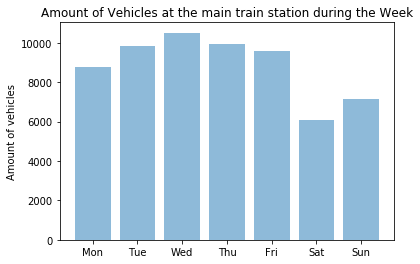

In [81]:
#als erstes wie viele sind über die Wochentage da als Plot
sorter = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sorterIndex = dict(zip(sorter,range(len(sorter))))
vehicles_station['Day_id'] = vehicles_station.index
vehicles_station['Day_id'] = vehicles_station['Day_of_week'].map(sorterIndex)
vehicles_station.sort_values('Day_id', inplace=True)
y_pos = np.arange(len(vehicles_station['Day_of_week']))
plt.bar(y_pos, vehicles_station['VEHICLE_HAL_ID'], align='center', alpha=0.5)
plt.xticks(y_pos, vehicles_station['Day_of_week'])
plt.ylabel('Amount of vehicles')
plt.title('Amount of Vehicles at the main train station during the Week')

plt.show()

### Amount of vehicles that arrive/leave the main train station over the day

In [82]:
#Plot the amount of vehicles at this station over the day
booking_vehicle_start_three = booking_vehicle_start.groupby(["START_RENTAL_ZONE", "hour"], as_index = False)['VEHICLE_HAL_ID'].count()
vehicles_station_hour = booking_vehicle_start_three[booking_vehicle_start_three['START_RENTAL_ZONE'].str.contains('Hauptbahnhof Haupteingang')]
vehicles_station_hour

,START_RENTAL_ZONE,hour,VEHICLE_HAL_ID
3585,Hauptbahnhof Haupteingang (Vorplatz),00,1715
3586,Hauptbahnhof Haupteingang (Vorplatz),01,1755
3587,Hauptbahnhof Haupteingang (Vorplatz),02,1270
3588,Hauptbahnhof Haupteingang (Vorplatz),03,753
3589,Hauptbahnhof Haupteingang (Vorplatz),04,434
3590,Hauptbahnhof Haupteingang (Vorplatz),05,440
3591,Hauptbahnhof Haupteingang (Vorplatz),06,1567
3592,Hauptbahnhof Haupteingang (Vorplatz),07,6259
3593,Hauptbahnhof Haupteingang (Vorplatz),08,7027
3594,Hauptbahnhof Haupteingang (Vorplatz),09,3496


In [83]:
vehicles_station_hour['VEHICLE_HAL_ID'].sum()

61872

In [84]:
#now also get leaving bikes for the following plot
booking_vehicle_end = booking_set_frankfurt_20152016.loc[:,['BOOKING_HAL_ID', 'END_RENTAL_ZONE', 'END_RENTAL_ZONE_HAL_ID', 'VEHICLE_HAL_ID', 'Day_of_week', 'hour']]
booking_vehicle_end_two = booking_vehicle_end.groupby(["END_RENTAL_ZONE", "hour"], as_index = False)['VEHICLE_HAL_ID'].count()
vehicles_station_hour_end = booking_vehicle_end_two[booking_vehicle_end_two['END_RENTAL_ZONE'].str.contains('Hauptbahnhof Haupteingang')]
vehicles_station_hour_end

,END_RENTAL_ZONE,hour,VEHICLE_HAL_ID
3643,Hauptbahnhof Haupteingang (Vorplatz),00,573
3644,Hauptbahnhof Haupteingang (Vorplatz),01,486
3645,Hauptbahnhof Haupteingang (Vorplatz),02,430
3646,Hauptbahnhof Haupteingang (Vorplatz),03,364
3647,Hauptbahnhof Haupteingang (Vorplatz),04,366
3648,Hauptbahnhof Haupteingang (Vorplatz),05,709
3649,Hauptbahnhof Haupteingang (Vorplatz),06,1659
3650,Hauptbahnhof Haupteingang (Vorplatz),07,2345
3651,Hauptbahnhof Haupteingang (Vorplatz),08,2405
3652,Hauptbahnhof Haupteingang (Vorplatz),09,1873


In [85]:
vehicles_station_hour_end['VEHICLE_HAL_ID'].sum()

62063

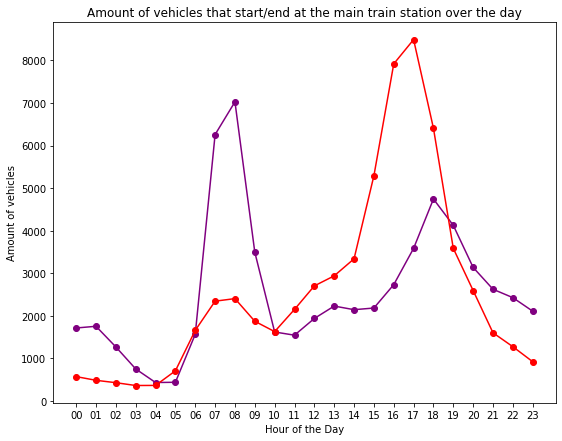

In [86]:
#this plot shows the bikes at the main train station that are leaving in violet and that are arriving in red
# Create the plot space upon which to plot the data 
fig, ax = plt.subplots(figsize=(9, 7))

# Add the x-axis and the y-axis to the plot
ax.plot(vehicles_station_hour['hour'],
        vehicles_station_hour['VEHICLE_HAL_ID'], '-o',
        color='purple')

ax.plot(vehicles_station_hour_end['hour'],
        vehicles_station_hour_end['VEHICLE_HAL_ID'], '-o',
        color='red')
# Set title and labels for axes
ax.set(xlabel="Hour of the Day",
       ylabel="Amount of vehicles",
       title="Amount of vehicles that start/end at the main train station over the day")
plt.show()

In [87]:
#now these are total amounts lets see what the mean says

### the mean of vehicles that start/end among all stations over the day

In [88]:
vehicle_start_count = booking_vehicle_start.groupby(["START_RENTAL_ZONE", "hour"], as_index = False)['VEHICLE_HAL_ID'].count()
vehicle_start_count

,START_RENTAL_ZONE,hour,VEHICLE_HAL_ID
0,Ackermannstraße / Cordierstraße,00,4
1,Ackermannstraße / Cordierstraße,01,3
2,Ackermannstraße / Cordierstraße,02,3
3,Ackermannstraße / Cordierstraße,03,6
4,Ackermannstraße / Cordierstraße,04,3
...,...,...,...
7369,zzz4 vormals Sandhofschleife / Paul-Ehrlich-St...,19,53
7370,zzz4 vormals Sandhofschleife / Paul-Ehrlich-St...,20,50
7371,zzz4 vormals Sandhofschleife / Paul-Ehrlich-St...,21,24
7372,zzz4 vormals Sandhofschleife / Paul-Ehrlich-St...,22,19


In [89]:
vehicle_start_mean = vehicle_start_count.groupby(["hour"], as_index = False)['VEHICLE_HAL_ID'].mean()
vehicle_start_mean['VEHICLE_HAL_ID']  = round(vehicle_start_mean['VEHICLE_HAL_ID']) #rude Werte
vehicle_start_mean

,hour,VEHICLE_HAL_ID
0,00,61.0
1,01,56.0
2,02,41.0
3,03,28.0
4,04,18.0
5,05,21.0
6,06,50.0
7,07,175.0
8,08,287.0
9,09,180.0


In [90]:
#same for end
vehicle_end_count = booking_vehicle_end.groupby(["END_RENTAL_ZONE", "hour"], as_index = False)['VEHICLE_HAL_ID'].count()
vehicle_end_count

,END_RENTAL_ZONE,hour,VEHICLE_HAL_ID
0,Ackermannstraße / Cordierstraße,00,9
1,Ackermannstraße / Cordierstraße,01,13
2,Ackermannstraße / Cordierstraße,02,13
3,Ackermannstraße / Cordierstraße,03,8
4,Ackermannstraße / Cordierstraße,04,7
...,...,...,...
7438,zzz4 vormals Sandhofschleife / Paul-Ehrlich-St...,19,51
7439,zzz4 vormals Sandhofschleife / Paul-Ehrlich-St...,20,34
7440,zzz4 vormals Sandhofschleife / Paul-Ehrlich-St...,21,34
7441,zzz4 vormals Sandhofschleife / Paul-Ehrlich-St...,22,15


In [91]:
vehicle_end_mean = vehicle_end_count.groupby(["hour"], as_index = False)['VEHICLE_HAL_ID'].mean()
vehicle_end_mean['VEHICLE_HAL_ID']  = round(vehicle_end_mean['VEHICLE_HAL_ID']) 
vehicle_end_mean

,hour,VEHICLE_HAL_ID
0,00,59.0
1,01,54.0
2,02,39.0
3,03,26.0
4,04,17.0
5,05,20.0
6,06,52.0
7,07,178.0
8,08,290.0
9,09,180.0


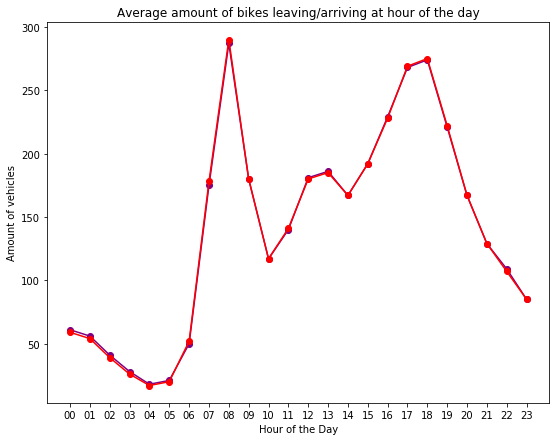

In [92]:
# Create the plot space upon which to plot the data 
fig, ax = plt.subplots(figsize=(9, 7))

# Add the x-axis and the y-axis to the plot
ax.plot(vehicle_start_mean['hour'],
        vehicle_start_mean['VEHICLE_HAL_ID'], '-o',
        color='purple')

ax.plot(vehicle_end_mean['hour'],
        vehicle_end_mean['VEHICLE_HAL_ID'], '-o',
        color='red')
# Set title and labels for axes
ax.set(xlabel="Hour of the Day",
       ylabel="Amount of vehicles",
       title="Average amount of bikes leaving/arriving at hour of the day")
plt.show()

In [93]:
#so we see that this plot us relatively unteresting since the mean duration of the bookings is under an hour
#however we might look at a specific time interval closer

### Amount of vehicles that leave/start at the main train station between 7 and 10 am

In [95]:
booking_vehicle_start = booking_set_frankfurt_20152016.loc[:,['BOOKING_HAL_ID', 'START_RENTAL_ZONE', 'START_RENTAL_ZONE_HAL_ID', 'VEHICLE_HAL_ID', 'DATE_BOOKING']]

In [96]:
booking_vehicle_start

,BOOKING_HAL_ID,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,VEHICLE_HAL_ID,DATE_BOOKING
4285336,27689041,Roßmarkt / An der Hauptwache,214380.0,115667,2015-01-01 00:30:20
4285873,27689080,Woolworth Leipziger Strasse,226253.0,116175,2015-01-01 00:42:51
4286542,27689151,Markus-Krankenhaus,227460.0,110256,2015-01-01 01:00:19
4286567,27689154,Markus-Krankenhaus,227460.0,116123,2015-01-01 01:00:47
4286706,27689156,Markus-Krankenhaus,227460.0,116839,2015-01-01 01:00:58
...,...,...,...,...,...
14613160,43561784,Hauptbahnhof Haupteingang (Vorplatz),214419.0,165502,2016-12-31 23:13:00
14613511,43561828,Taunusstraße / Gallusanlage,28951.0,164856,2016-12-31 23:23:28
14612056,43561832,Sternstraße / Unterweg,257334.0,164045,2016-12-31 23:24:03
14615815,43561863,Sternstraße / Unterweg,257334.0,165498,2016-12-31 23:28:04


In [97]:
booking_vehicle_start['time'] = booking_vehicle_start['DATE_BOOKING'].dt.strftime('%X')

In [98]:
booking_vehicle_start

,BOOKING_HAL_ID,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,VEHICLE_HAL_ID,DATE_BOOKING,time
4285336,27689041,Roßmarkt / An der Hauptwache,214380.0,115667,2015-01-01 00:30:20,00:30:20
4285873,27689080,Woolworth Leipziger Strasse,226253.0,116175,2015-01-01 00:42:51,00:42:51
4286542,27689151,Markus-Krankenhaus,227460.0,110256,2015-01-01 01:00:19,01:00:19
4286567,27689154,Markus-Krankenhaus,227460.0,116123,2015-01-01 01:00:47,01:00:47
4286706,27689156,Markus-Krankenhaus,227460.0,116839,2015-01-01 01:00:58,01:00:58
...,...,...,...,...,...,...
14613160,43561784,Hauptbahnhof Haupteingang (Vorplatz),214419.0,165502,2016-12-31 23:13:00,23:13:00
14613511,43561828,Taunusstraße / Gallusanlage,28951.0,164856,2016-12-31 23:23:28,23:23:28
14612056,43561832,Sternstraße / Unterweg,257334.0,164045,2016-12-31 23:24:03,23:24:03
14615815,43561863,Sternstraße / Unterweg,257334.0,165498,2016-12-31 23:28:04,23:28:04


In [99]:
booking_vehicle_start_2 = booking_vehicle_start.drop('DATE_BOOKING', axis=1)

In [100]:
booking_vehicle_start_3 = booking_vehicle_start_2.groupby(["START_RENTAL_ZONE", "time"], as_index = False)['VEHICLE_HAL_ID'].count()
vehicles_station_4 = booking_vehicle_start_3[booking_vehicle_start_3['START_RENTAL_ZONE'].str.contains('Hauptbahnhof Haupteingang')]
vehicles_station_4

,START_RENTAL_ZONE,time,VEHICLE_HAL_ID
451152,Hauptbahnhof Haupteingang (Vorplatz),00:00:15,1
451153,Hauptbahnhof Haupteingang (Vorplatz),00:00:19,1
451154,Hauptbahnhof Haupteingang (Vorplatz),00:00:21,1
451155,Hauptbahnhof Haupteingang (Vorplatz),00:00:24,1
451156,Hauptbahnhof Haupteingang (Vorplatz),00:00:29,1
...,...,...,...
490929,Hauptbahnhof Haupteingang (Vorplatz),23:59:48,1
490930,Hauptbahnhof Haupteingang (Vorplatz),23:59:50,1
490931,Hauptbahnhof Haupteingang (Vorplatz),23:59:51,1
490932,Hauptbahnhof Haupteingang (Vorplatz),23:59:52,1


In [101]:
start = '07:00:00'
end = '10:00:00'
filters = (vehicles_station_4['time'] >= start) & (vehicles_station_4['time'] <= end)
vehicles_station_5 = vehicles_station_4.loc[filters]

In [102]:
vehicles_station_5

,START_RENTAL_ZONE,time,VEHICLE_HAL_ID
457455,Hauptbahnhof Haupteingang (Vorplatz),07:00:03,3
457456,Hauptbahnhof Haupteingang (Vorplatz),07:00:04,1
457457,Hauptbahnhof Haupteingang (Vorplatz),07:00:07,1
457458,Hauptbahnhof Haupteingang (Vorplatz),07:00:08,1
457459,Hauptbahnhof Haupteingang (Vorplatz),07:00:10,1
...,...,...,...
465394,Hauptbahnhof Haupteingang (Vorplatz),09:59:53,1
465395,Hauptbahnhof Haupteingang (Vorplatz),09:59:54,1
465396,Hauptbahnhof Haupteingang (Vorplatz),09:59:56,1
465397,Hauptbahnhof Haupteingang (Vorplatz),09:59:59,1


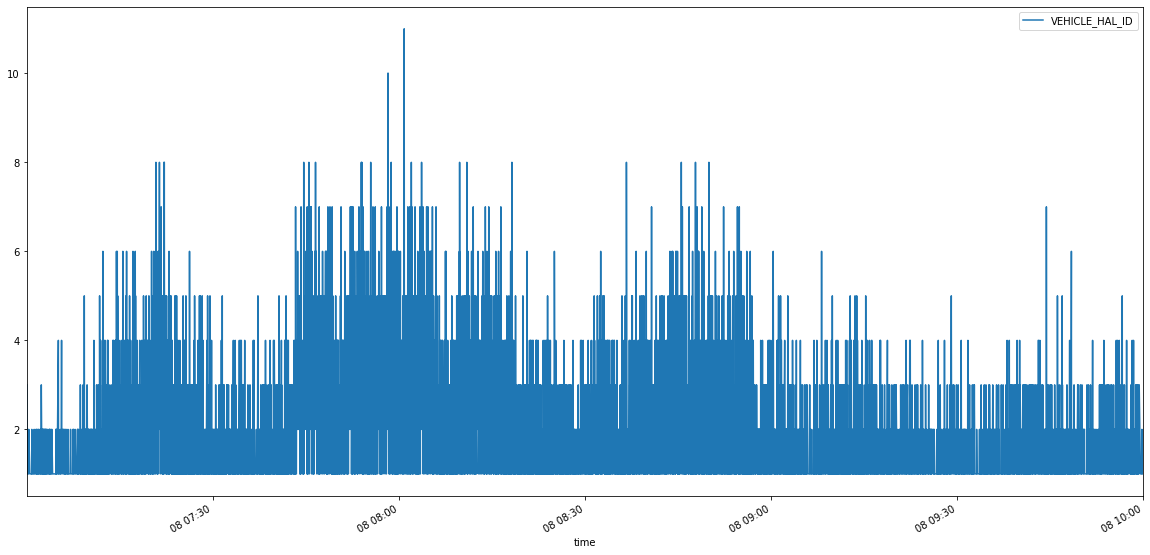

In [103]:
vehicles = vehicles_station_5.drop('START_RENTAL_ZONE', axis=1)
vehicles['time'] = pd.to_datetime(vehicles['time'])
vehicles2 = vehicles.set_index('time')
vehicles2.plot(figsize=(20,10))


### Routes/Stations - Often used vs seldomly used

In [104]:
#select the columns that you need for the end station
booking_vehicle_end = booking_set_frankfurt_20152016.loc[:,['BOOKING_HAL_ID', 'END_RENTAL_ZONE', 'END_RENTAL_ZONE_HAL_ID', 'Day_of_week', 'hour']]

In [105]:
#see the distribution of stations 
start_stations_busy = booking_set_frankfurt_20152016.groupby(booking_set_frankfurt_20152016['START_RENTAL_ZONE'], as_index=False).size()

In [106]:
start_stations_busy.nlargest(10)

START_RENTAL_ZONE
Hauptbahnhof Haupteingang (Vorplatz)            61872
Hauptbahnhof / Taxistand                        24510
Pfarrer-Perabo-Platz / Kleyerstraße             21939
Campus Westend Hörsaalzentrum                   21840
Konstablerwache                                 21054
Carlo-Schmidt-Platz  / Depot                    18321
Opernplatz / Bockenheimer Landstaße             17463
Roßmarkt / An der Hauptwache                    16204
Bockenheimer Landstraße / Liebigstraße          15729
Jürgen-Ponto-Platz / Neckarstraße (DB-Tower)    14868
dtype: int64

In [107]:
start_stations_busy.nsmallest(10)

START_RENTAL_ZONE
Commerzbank Gallileo                     3
Bechtenwaldstraße / Hahnbergweg         23
S-Bahn Station Farbwerke                25
BSC Grafittihalle                       32
Bahnhof Bieber / Poststraße             34
Hans-Böckler-Straße / Geißspitzweg      48
Sindlinger Bahnstraße / Farbenstraße    50
Dufourstraße / Dunantring               63
S-Bahn Station Berkersheim              64
S-Bahn Station Zeilsheim                64
dtype: int64

In [108]:
#let's check the most used actual routes that we have, not just start and end stations, but the combinations of both
routes = booking_set_frankfurt.groupby(['START_RENTAL_ZONE','END_RENTAL_ZONE']).size().reset_index().rename(columns={0:'count'})
routes

,START_RENTAL_ZONE,END_RENTAL_ZONE,count
0,Ackermannstraße / Cordierstraße,Ackermannstraße / Cordierstraße,134
1,Ackermannstraße / Cordierstraße,Ackermannstraße / Kleyerstraße,2
2,Ackermannstraße / Cordierstraße,Adam-Riese-Platz / Hafenstraße,3
3,Ackermannstraße / Cordierstraße,Adlerwerke Kleyerstrasse / Kriegkstrasse,9
4,Ackermannstraße / Cordierstraße,Affentorplatz,1
...,...,...,...
50727,zzz4 vormals Sandhofschleife / Paul-Ehrlich-St...,Wiesenhüttenplatz,2
50728,zzz4 vormals Sandhofschleife / Paul-Ehrlich-St...,Wilhelm-Leuschner-Straße/ Windmühlstraße,5
50729,zzz4 vormals Sandhofschleife / Paul-Ehrlich-St...,Woolworth Leipziger Strasse,3
50730,zzz4 vormals Sandhofschleife / Paul-Ehrlich-St...,Ziegelhüttenplatz / Ziegelhüttenweg,15


In [109]:
routes.sort_values(by=['count'])

,START_RENTAL_ZONE,END_RENTAL_ZONE,count
25365,Idsteiner Straße / Schneidhainer Straße,Kettenhofweg / Corneliusstraße,1
21918,Grüneburgweg / Siesmayerstraße (Palmengarten),Bruchfeldplatz,1
49229,Wilhelm-Leuschner-Straße/ Windmühlstraße,Ernst-May-Platz,1
21929,Grüneburgweg / Siesmayerstraße (Palmengarten),Cronstettenstraße / Klettenbergstraße,1
49227,Wilhelm-Leuschner-Straße/ Windmühlstraße,Elbinger Straße / Trakehner Straße,1
...,...,...,...
35805,Pfarrer-Perabo-Platz / Kleyerstraße,Hauptbahnhof Haupteingang (Vorplatz),5201
24382,Hauptbahnhof Haupteingang (Vorplatz),Hauptbahnhof Haupteingang (Vorplatz),5328
35868,Pfarrer-Perabo-Platz / Kleyerstraße,S-Bahn Station Galluswarte / Mainzer Landstraße,5878
24153,Hauptbahnhof / Taxistand,Pfarrer-Perabo-Platz / Kleyerstraße,6728


## Section for open questions/problems/what might be mentioned in the afterthought

<p>There are some open questions regarding certain terms on the documentation which will be asked in German here since the documentation is in German:<p>
    Zur Buchungsdatei: Was genau bedeuten die Begriffe Sperrkunden (etwa ein Kunde, der gesperrt ist? Aber wie kann ein gesperrter Kunde eine Buchung durchführen? BLOCK_CUSTOMER_X soll ja gerade das aussagen), Quernutzung (etwa dass man mehrere Buchungen gleichzeitig laufen hat?), "statistik-relevant" (heißt das für uns, die Daten, die nicht statistik-relevant sind, sind für unsere Statistik nicht relevant?), Rahmenunterbuchung (wenn man auf eine bestimmte Zeit gebucht hat, aber da drunter liegt am Ende?) und Rahmenoberbuchung (das Gegenteil von vorher?) sowie Metastandort (die erste Station?)? 
   
Then don't forget to mention certain information: A person can book a bike up to 72 hours. A person can also book multiple bikes at the same time (up to 2 apparently). 

Also remember the discussion form the website about the stations. That they do not include all stations but like 99 percent of them.